In [1]:
import os
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'torchvision'

In [2]:

# Define the directory containing the images
folder_path = 'C:\\Users\\ilyas\\Desktop\\VIDEO2BLOG\\allframes'

# Define a transform to convert PIL images to tensors and resize them to a fixed size
transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resize each image to 224x224
    transforms.ToTensor(), # Convert the PIL Image to a tensor
])

# Function to load images and convert them to tensors
def load_images_to_tensors(folder_path):
    image_tensors = []
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        if os.path.isfile(img_path):
            # Open the image
            img = Image.open(img_path).convert('RGB') # Ensure image is RGB
            # Apply the transform and add the tensor to the list
            img_tensor = transform(img)
            image_tensors.append(img_tensor)
            print(img_path)
    return image_tensors

# Load the images as tensors
image_tensors = load_images_to_tensors(folder_path)

# Now `image_tensors` contains the tensors of the images in the folder
# All tensors are of the same dimension (3, 224, 224) due to the resize operation


C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame0.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10020.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10080.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10140.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame1020.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10200.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10260.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10320.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10380.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10440.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10500.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10560.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10620.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10680.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10740.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame1080.jpg
C:\Users\ilyas\Desktop\VIDEO2BLOG\allframes\frame10800.jpg
C:\

In [4]:

# Simulating loading images by generating random tensors
# Let's assume each image tensor is of shape (3, 224, 224) similar to an RGB image of size 224x224
num_images = len(image_tensors)


# Function to calculate cosine similarity between two tensors
def cosine_similarity(tensor1, tensor2):
    cos = torch.nn.CosineSimilarity(dim=0)
    similarity = cos(tensor1.view(-1), tensor2.view(-1))
    return similarity.item()

# Calculating cosine similarities between consecutive image tensors
cosine_similarities = [cosine_similarity(image_tensors[i], image_tensors[i+1]) for i in range(num_images-1)]



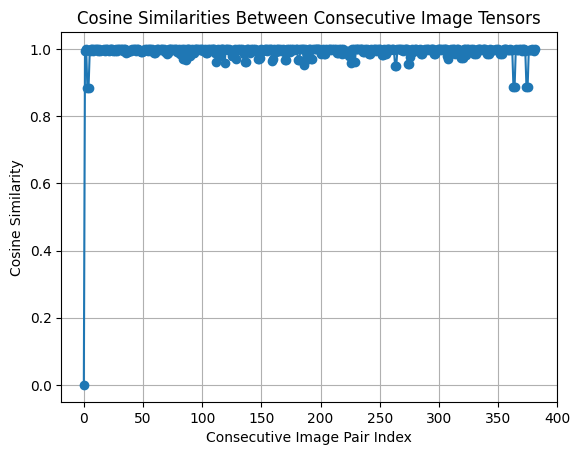

In [5]:
# Plotting the cosine similarities
plt.plot(cosine_similarities, marker='o', linestyle='-')
plt.title('Cosine Similarities Between Consecutive Image Tensors')
plt.xlabel('Consecutive Image Pair Index')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()
